In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("1.01. Simple linear regression.csv")
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [5]:
df.isna().sum()

SAT    0
GPA    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [7]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [8]:
X_train, X_test, Y_train, Y_test  = train_test_split(df["SAT"],df["GPA"],test_size=0.2, random_state=42) 

In [9]:
print(X_train)

print(Y_train)

76    1997
42    1966
49    1979
11    1775
30    1769
      ... 
20    1761
60    1964
71    1778
14    1773
51    1855
Name: SAT, Length: 67, dtype: int64
76    3.64
42    3.38
49    3.41
11    3.07
30    3.28
      ... 
20    3.19
60    3.49
71    3.59
14    3.12
51    3.42
Name: GPA, Length: 67, dtype: float64


In [10]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(67,)
(67,)
(17,)
(17,)


In [11]:
print("Values of X_train = ",X_train.values)
print("Values of Y_train = ",Y_train.values)

print("Values of X_test = ",X_test.values)
print("Values of X_test = ",Y_test.values)

Values of X_train =  [1997 1966 1979 1775 1769 1831 2020 1850 1861 1670 1925 1934 1880 1990
 2050 1755 1893 1764 1934 1730 1786 1931 1826 1634 1712 1893 1685 1674
 1777 1792 1850 1764 1808 2015 1808 1802 1824 1962 1872 1821 1850 1787
 1857 1974 1702 1810 2020 1953 1775 1936 1891 2041 1975 1954 1794 1664
 1907 1722 1760 1687 1843 2021 1761 1964 1778 1773 1855]
Values of Y_train =  [3.64 3.38 3.41 3.07 3.28 3.37 3.28 3.01 3.58 2.91 3.4  3.28 3.29 3.39
 3.81 3.17 3.51 3.   3.54 3.47 3.19 3.58 3.28 3.42 3.08 3.5  2.74 3.17
 3.37 3.01 3.52 3.   3.32 3.62 3.49 3.41 3.4  3.76 3.17 3.28 3.38 3.28
 3.41 3.24 3.39 3.71 3.65 3.47 3.29 3.71 3.48 3.51 3.6  3.34 3.28 2.52
 3.42 3.19 2.54 3.21 3.71 3.61 3.19 3.49 3.59 3.12 3.42]
Values of X_test =  [1934 1714 1781 1663 1735 1933 1735 1842 1693 1832 1865 1956 1849 1987
 1887 1879 1855]
Values of X_test =  [3.6  2.4  3.47 3.2  3.08 3.59 3.02 3.17 2.83 3.52 3.37 3.4  3.31 3.73
 3.47 3.44 3.29]


In [12]:
x_train = X_train.values.reshape(-1,1)
y_train = Y_train.values.reshape(-1,1)
x_test= X_test.values.reshape(-1,1)
y_test= Y_test.values.reshape(-1,1)

In [13]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(67, 1)
(67, 1)
(17, 1)
(17, 1)


In [14]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(x_test)
x_test

array([[1934],
       [1714],
       [1781],
       [1663],
       [1735],
       [1933],
       [1735],
       [1842],
       [1693],
       [1832],
       [1865],
       [1956],
       [1849],
       [1987],
       [1887],
       [1879],
       [1855]])

In [16]:
print("Prediction of this model ",r2_score(y_test,y_pred))

Prediction of this model  0.46949246374602127


In [20]:
error = y_test - y_pred
print("Error:", error)


Error: [[ 0.13367756]
 [-0.7432091 ]
 [ 0.2283882 ]
 [ 0.13169445]
 [-0.09405174]
 [ 0.12514626]
 [-0.15405174]
 [-0.16120231]
 [-0.28236646]
 [ 0.20348466]
 [ 0.00501766]
 [-0.09863377]
 [-0.03148319]
 [ 0.18583662]
 [ 0.07270632]
 [ 0.0544559 ]
 [-0.06029538]]


In [19]:
m = lr.coef_
c= lr.intercept_

x= 1664
y = m*x+c
y

array([[3.06977425]])

In [24]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)  

Mean Absolute Error =  0.16268831265429598


In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error = ", mse)

Mean Squared Error =  0.05248610269753723


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error =", rmse)


Root Mean Squared Error: 0.05248610269753723


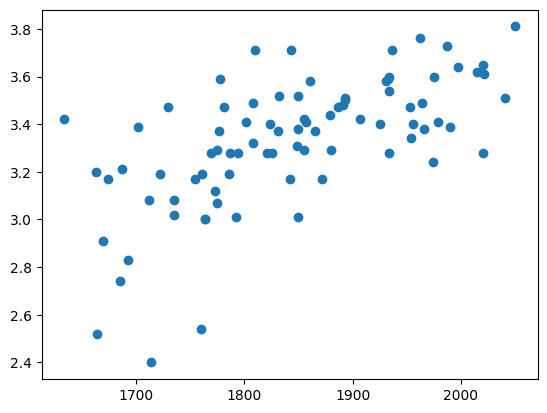

In [32]:
plt.scatter(df["SAT"],df["GPA"])
plt.show()

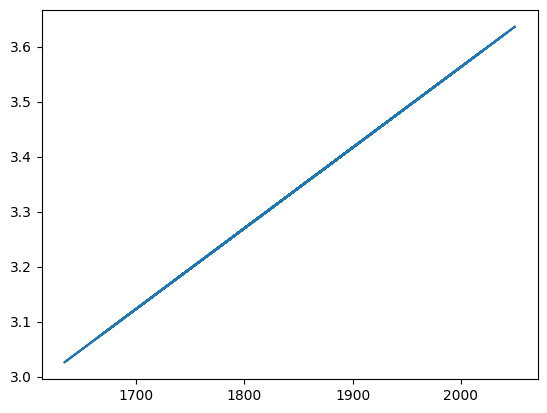

In [33]:
plt.plot(x_train, lr.predict(x_train))
plt.show()

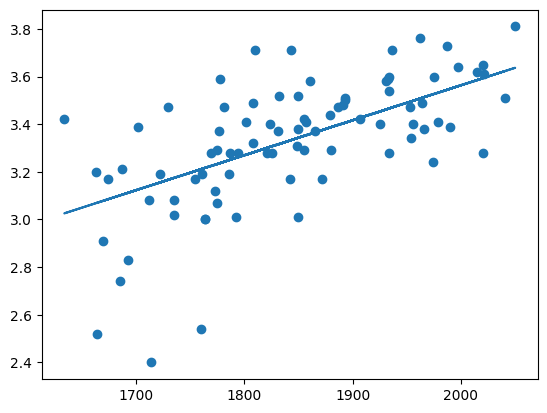

In [35]:
plt.scatter(df["SAT"],df["GPA"])
plt.plot(x_train, lr.predict(x_train))
plt.show()